In [21]:
import networkx as nx
import random
import matplotlib.pyplot as plt

In [2]:
def plot_graph(G):
    nx.draw(G, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')

2 [{1, 2, 5}, {3, 4}]


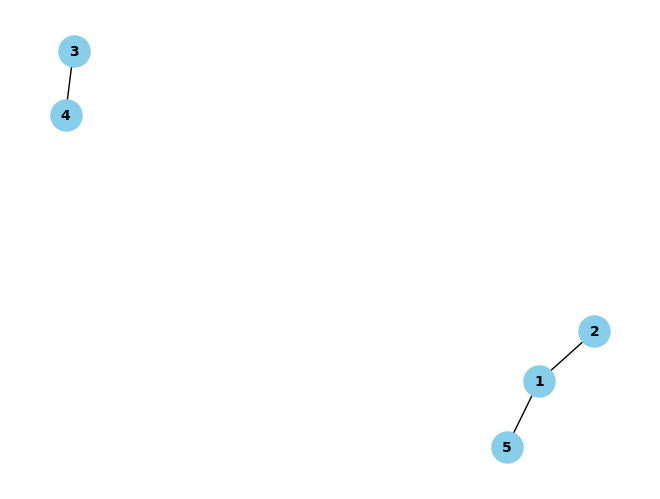

In [3]:
G = nx.Graph()

nodes = [1, 2, 3, 4, 5]

G.add_nodes_from(nodes)

edges = [(1, 2), (3, 4), (1, 5)]

G.add_edges_from(edges)

nx.draw(G, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')

cc_nx = list(nx.connected_components(G))
no_cc = len(cc_nx)
print(no_cc, cc_nx)

In [4]:
def in_any_set(k, cc):
    for i, _set in enumerate(cc):
        if k in _set:
            return True
    return False

In [5]:
def which_set(k, cc):
    for i, _set in enumerate(cc):
        if k in _set:
            return i
    return None

In [6]:
# test the functions
cc = [(1, 0, 4), (2, 3)]

print("in_any_set \n")
for i in range(7):
    print(in_any_set(i, cc))

print("\nwhich_set \n")
for i in range(7):
    print(which_set(i, cc))

in_any_set 

True
True
True
True
True
False
False

which_set 

0
0
1
1
0
None
None


In [48]:
def my_connected_components(graph):
    cc = []
    for v, edges in graph.items():
        if edges != []:
            if not in_any_set(v, cc):
                cc.append(set([v]))
                for edge in edges:
                    if not in_any_set(edge, cc):
                        cc[which_set(v, cc)].add(edge)
            elif in_any_set(edge, cc):
                cc[which_set(v, cc)].add(v)
    return cc

def my_no_connected_components(graph):
    return len(my_connected_components(graph))

In [49]:
VERTS = nodes.copy()
EDGES = edges.copy()
g = {i: [j for j in VERTS if j!=i and (i, j) in EDGES or (j, i) in EDGES] for i in VERTS}

print(my_no_connected_components(g), my_connected_components(g))

2 [{1, 2, 5}, {3, 4}]


In [50]:
def convert_G(G):
    dict = {}
    
    for node in G.nodes():
        dict[node] = dict.get(node, []) 
        
    for edge in G.edges():
        v1, v2 = edge[0], edge[1]
        dict.get(v1).append(v2)
        dict.get(v2).append(v1)

    return dict

In [51]:
print(g)
print(convert_G(G))
print(g == convert_G(G))

{1: [2, 5], 2: [1], 3: [4], 4: [3], 5: [1]}
{}
False


In [52]:
cc_nx = list(nx.connected_components(G))
no_cc = len(cc_nx)
print(no_cc, cc_nx)

0 []


In [53]:
print(my_no_connected_components(convert_G(G)) == len(list(nx.connected_components(G))))

True


In [54]:
#def generate_random_graph1():
#    size = 10
#    
#    G = nx.Graph()
#
#    no_nodes = random.randint(3, size)
#    
#    nodes = [i for i in range(1, no_nodes)]
#
#    G.add_nodes_from(nodes)
#
#    edges = []
#    for i in range(size):
#        edges.append(tuple(random.sample(nodes, 2)))
#
#    G.add_edges_from(edges)
#    return G
#    
#plot_graph(generate_random_graph())

In [55]:
def generate_random_graph():
    n = 7
    prob = 0.1
    V = list(range(1, n+1))
    E = [(i, j) for i in V for j in V if i<j and random.random() < prob]
    return V, E

generate_random_graph()

([1, 2, 3, 4, 5, 6, 7], [(1, 2)])

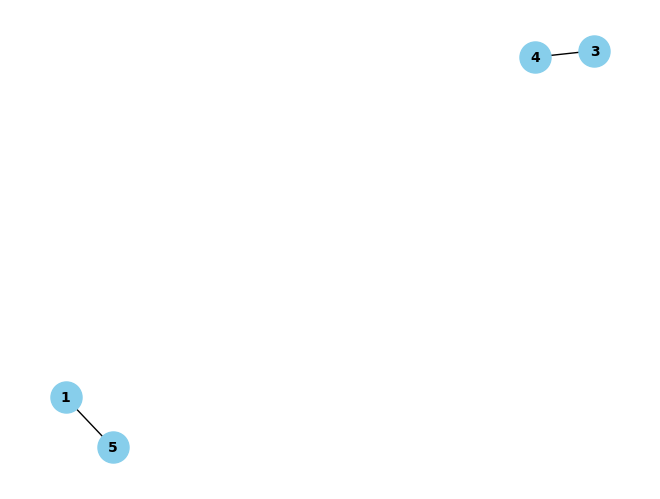

In [56]:
V, E = generate_random_graph()

def convert_to_G(E):
    G = nx.Graph()
    G.add_edges_from(E)
    return G

convert_to_G(E)
plot_graph(convert_to_G(E))

nx   [] 
mine []
0 0
{1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}


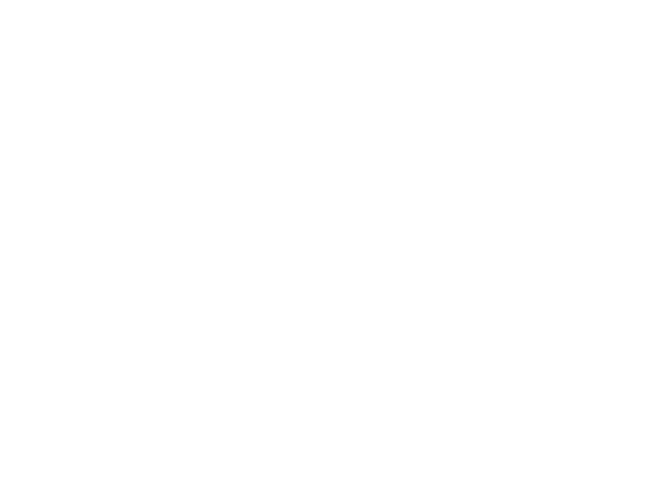

nx   [{2, 3, 7}] 
mine [{2, 7}, {3}]
1 2
{1: [], 2: [7], 3: [7], 4: [], 5: [], 6: [], 7: [2, 3]}


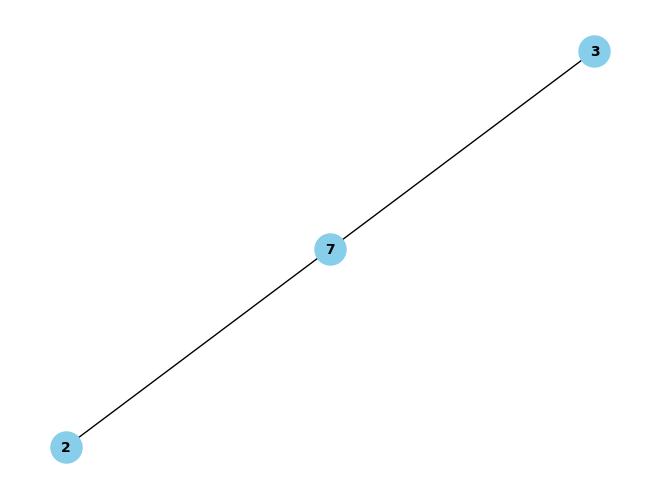

nx   [{3, 5, 7}] 
mine [{3, 5}, {7}]
1 2
{1: [], 2: [], 3: [5], 4: [], 5: [3, 7], 6: [], 7: [5]}


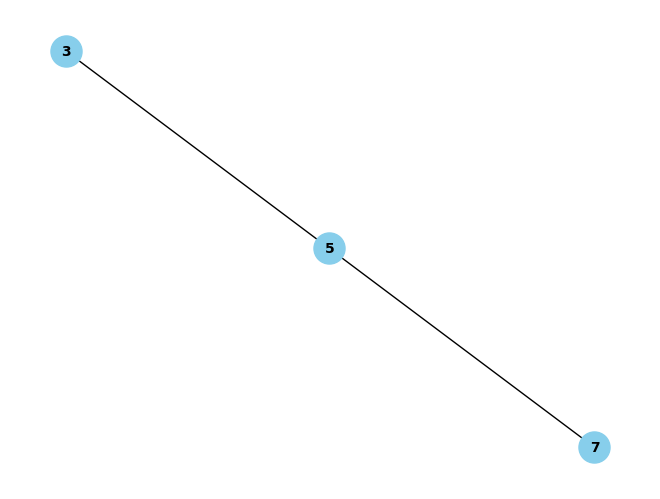

nx   [{1, 5}, {2, 3, 4, 6}] 
mine [{1, 5}, {2, 3}, {4, 6}]
2 3
{1: [5], 2: [3], 3: [2, 6], 4: [6], 5: [1], 6: [3, 4], 7: []}


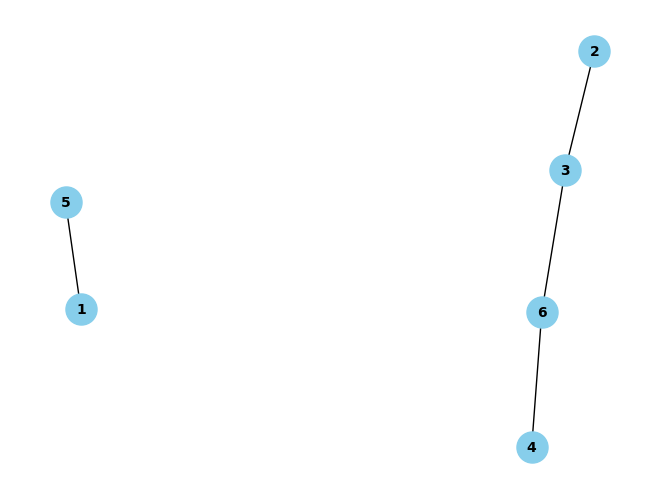

nx   [{1, 2, 3}] 
mine [{1, 3}, {2}]
1 2
{1: [3], 2: [3], 3: [1, 2], 4: [], 5: [], 6: [], 7: []}


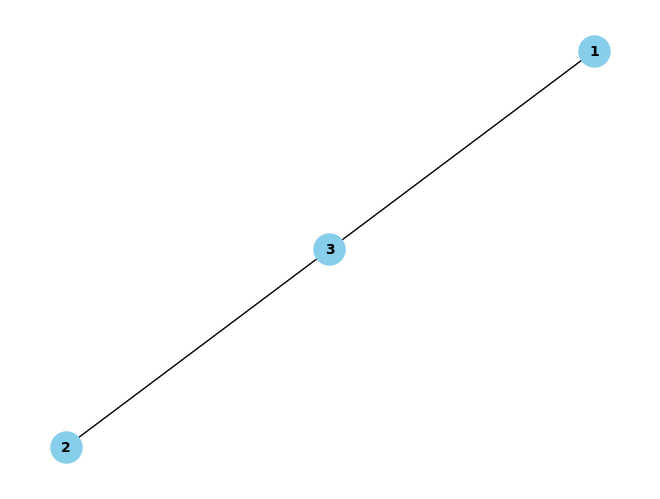

nx   [{3, 4, 5, 7}] 
mine [{3, 7}, {4, 5}]
1 2
{1: [], 2: [], 3: [7], 4: [5, 7], 5: [4], 6: [], 7: [3, 4]}


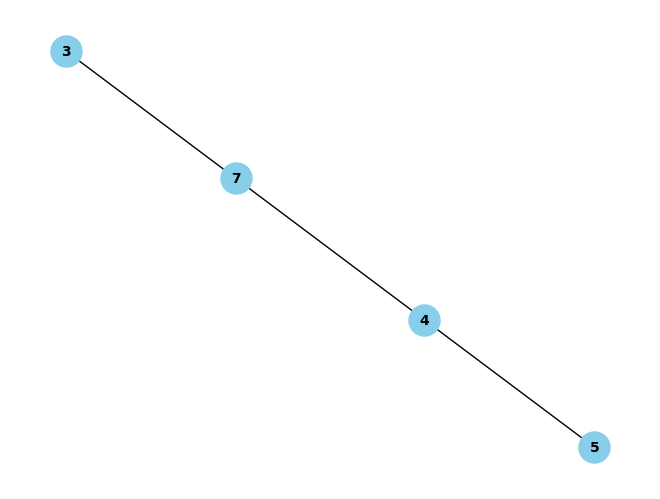

In [57]:
for _ in range(6):
    VERTS, EDGES = generate_random_graph()
    g = {i: [j for j in VERTS if j!=i and (i, j) in EDGES or (j, i) in EDGES] for i in VERTS}
    G = convert_to_G(EDGES)
    print("nx  ", list(nx.connected_components(G)), "\nmine", my_connected_components(g))
    print(len(list(nx.connected_components(G))), my_no_connected_components(g))
    print(g)
    plot_graph(G)
    plt.show()